# Week 25:Data Compression and Image Hacks
- toc: true 
- badges: true
- comments: true

# Question Answers / Notes: 

- MAC terminal commands to access files: 
  - "cd" to change directory, "ls" to list files and folders, "open" to open a file or folder.
- Windows terminal commands to access files: 
  - "cd" to change directory, "dir" to list files and folders, "start" to open a file or folder.
- Major differences between MAC and Windows terminal commands: 
  - MAC uses "cd" to change directory, while Windows uses "cd" as well. However, Windows uses "dir" to list files and folders, while MAC uses "ls". Additionally, MAC uses "open" to open a file or folder, while Windows uses "start".
 
- Why is path a big deal when working with images?
  - Path is important when working with images because it specifies the location of the image file on a computer. Without the correct location the image can not be accessed.
- How does the meta data source and label relate to Unit 5 topics?
  - Metadata sources and labels can be used to classify images. It allows us identify attributes of the images.
- Look up IPython, describe why this is interesting in Jupyter Notebooks for both Pandas and Images?
  - IPython allows for vizualization of images In Jupyter Notebooks. IPython can be used with libraries like Pandas for data analysis and with image processing libraries for working with images.


- Where have you been a consumer of buffering?
  - Whenever I have to login into an account. For example login into a drive account, studentvue account, etc.
- From your consumer experience, what effects have you experienced from buffering?
  - Data may be lost. For example when I was trying to submit a discussion post on canvas, the information was erased due to buffering and I had to start over. 
- How do these effects apply to images?
  - The images can be blurry or improperly sized.
  
- Does this code seem like a series of steps are being performed?
  - Yes, the code first acceses data, scales it, changes it, and finally updates it.
- Describe Grey Scale algorithm in English or Pseudo code?
  - The gray scale algorithm converts a color image into a grayscale image by averaging the color values of each pixel to create a single gray value.
- Describe scale image? What is before and after on pixels in three images?
  - Scale image involves resizing an image to a smaller or larger size. Before scaling, each pixel in the original image has a certain color and intensity. After scaling, the pixels are changed to create a new image with the differing scale.
- Is scale image a type of compression? If so, line it up with College Board terms described?
  - It is lossy compression because you lose information every time the image is scaled.


# Lossy Image:

![Alt text](../images/Flower_jtca001.jpg)

- This Image is a JPG and therefore a lossy image. This is the case as when the image is saved, the information is compressed and the quality is permanently reduced.



# Lossless Image

![Alt text](../images/Rugged_Mountain.png)

- This Image is a PNG and therefore a lossless image. This is the case as when the image is saved, the information is compressed in a way in which the quality is maintained.

Add Notes for the Cell.

# Programming Paradigm

---- meta data -----
Green Square
Internet
JPEG
RGB
Original size:  (1280, 960)
Scaled size:  (320, 240)
-- original image --



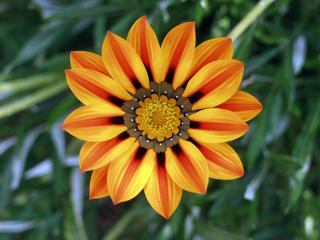

--- grey image ----



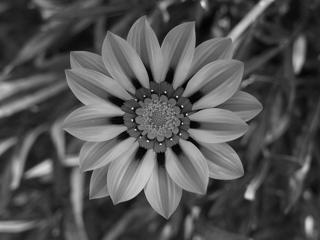

---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
Original size:  (571, 403)
Scaled size:  (320, 225)
-- original image --



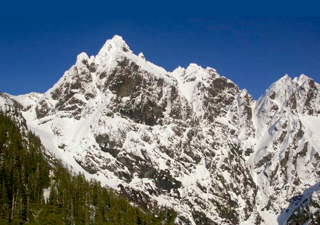

--- grey image ----



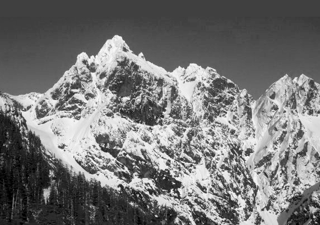

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (360, 360)
Scaled size:  (320, 320)
-- original image --



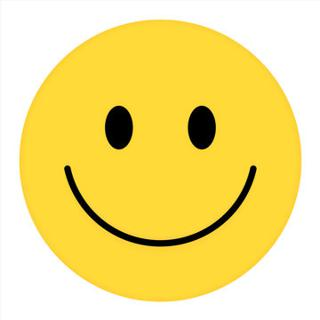

--- grey image ----



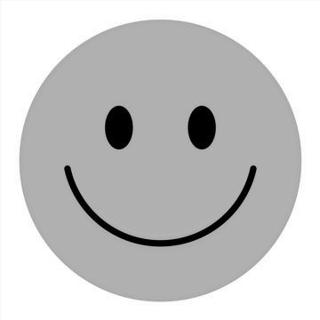

In [19]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("../images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "Flower_jtca001.jpg"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "Rugged_Mountain.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "smile.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    

def image_management_add_html_grey(image):
   
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  
    image['data'] = np.array(img_data) 
    image['gray_data'] = [] 

    
    for pixel in image['data']:
       
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['gray_data'].append((average, average, average, pixel[3])) # PNG format
        else:
            image['gray_data'].append((average, average, average))
    
        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)



if __name__ == "__main__":
  
    images = image_data()
    
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'])
        print("Scaled size: ", image['scaled_size'])
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_management_add_html_grey(image)
        display(HTML(image['html_grey'])) 
    print()

# Project Paradigm

For the Project Paradigm I decided to try to provide a binary report and a blurred image. 


In [21]:
from PIL import Image

img = Image.open('../images/Flower_jtca001.jpg')

width, height = img.size
count = 0  # Counter for number of pixels processed
for x in range(width):
    for y in range(height):
        if count == 50:  # Exit the loops if 50 pixels have been processed
            break
        
        pixel = img.getpixel((x, y))
        
        # Combine the color values into a single integer
        combined_pixel = (pixel[0] << 16) + (pixel[1] << 8) + pixel[2]
        
        # Convert the combined integer to binary and hexadecimal
        binary_pixel = "{0:b}".format(combined_pixel).zfill(24)
        hex_pixel = "{0:06x}".format(combined_pixel)
        
        print(f'Pixel ({x}, {y}): Binary - {binary_pixel}, Hexadecimal - {hex_pixel}')
        
        count += 1  # Increment the counter


Pixel (0, 0): Binary - 000111100011101000100011, Hexadecimal - 1e3a23
Pixel (0, 1): Binary - 001001110100001100101100, Hexadecimal - 27432c
Pixel (0, 2): Binary - 001001010100000100101010, Hexadecimal - 25412a
Pixel (0, 3): Binary - 000111100011101000100100, Hexadecimal - 1e3a24
Pixel (0, 4): Binary - 001000110011111100101001, Hexadecimal - 233f29
Pixel (0, 5): Binary - 001010010100010100101111, Hexadecimal - 29452f
Pixel (0, 6): Binary - 001001100100000100101110, Hexadecimal - 26412e
Pixel (0, 7): Binary - 001001010011111000101011, Hexadecimal - 253e2b
Pixel (0, 8): Binary - 001010010100000100110001, Hexadecimal - 294131
Pixel (0, 9): Binary - 001011110100011100110111, Hexadecimal - 2f4737
Pixel (0, 10): Binary - 001100010100100100111001, Hexadecimal - 314939
Pixel (0, 11): Binary - 001011100100011000111000, Hexadecimal - 2e4638
Pixel (0, 12): Binary - 001011000100010000110110, Hexadecimal - 2c4436
Pixel (0, 13): Binary - 001100000100100000111010, Hexadecimal - 30483a
Pixel (0, 14): B

In [4]:
from PIL import Image, ImageFilter
# Existing Image is opened and shown.
img = Image.open('../images/Flower_jtca001.jpg')
img.show()
# The blur filter is applied on the image and then showed.
blurImage = img.filter(ImageFilter.BLUR)
blurImage.show()


# Data Compression Quiz College Board: 

![Alt text](../images/Screen%20Shot%202023-03-12%20at%2010.55.10%20AM.png)


# Extracting Information from Data Quiz

![Alt text](../images/Screen%20Shot%202023-03-12%20at%2010.59.58%20AM.png)